# CISC 856: Reinforcement Learning
## Assignment 1: 2-Player Matrix Games
##### Hugh Morison (10179903)
##### Matthew Filipovich (20029031)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

prisoners_dilemma = np.array([[5, 0],
                              [10, 1]])
matching_coins = np.array([[1, -1],
                           [-1, 1]])
rock_paper_scissors = np.array([[0, -1, 1],
                                [1, 0, -1],
                                [-1, 1, 0]])
p1_rewards = [prisoners_dilemma, matching_coins, rock_paper_scissors]
p2_rewards = [p1_rewards[0].transpose(), -p1_rewards[1], -p1_rewards[2]]
action_labels = [['lie', 'confess'],
                 ['head', 'tail'],
                 ['rock', 'paper', 'scissors']]


def normalize(policy):
    if (policy < 0).any():
        raise ValueError('Policy has negative value')
    total = policy.sum()
    return policy/total


def play_game(policies, rewards):
    n = len(rewards[0])
    p1_action = np.random.choice(n, p=policies[0])
    p2_action = np.random.choice(n, p=policies[1])
    p1_reward = rewards[0][p1_action, p2_action]
    p2_reward = rewards[1][p1_action, p2_action]
    return (p1_action, p2_action), (p1_reward, p2_reward)


def update_policy(policy, action_taken, reward, learning_rate=0.005, expected_values=None, update_alg='standard'):
    if expected_values is None:
        expected_values = [0 for _ in range(len(policy))]
    for action in range(len(policy)):
        if action is not action_taken:
            if update_alg == 'standard':
                policy[action] += -learning_rate * reward * policy[action]
            elif update_alg == 'modified':
                policy[action] += -learning_rate * reward * policy[action] + learning_rate * (expected_values[action] - policy[action])
                expected_values[action] += learning_rate * policy[action]
            else:
                raise ValueError('Invalid value supplied to update_alg')
        else:
            if update_alg == 'standard':
                policy[action] += learning_rate * reward * (1-policy[action])
            elif update_alg == 'modified':
                policy[action] += learning_rate * reward * (1-policy[action]) + learning_rate * (expected_values[action] - policy[action])
                expected_values[action] += learning_rate * policy[action]
            else:
                raise ValueError('Invalid value supplied to update_alg')
    return normalize(policy), expected_values


def iterate(policy1, reward_matrix1, policy2, reward_matrix2, alpha=0.005, max_iterations=10000, update_alg='standard'):
    p_history = [[policy1],[policy2]]
    policies = [policy1, policy2]
    rewards = [reward_matrix1, reward_matrix2]
    expected_values = [0 for _ in range(len(policy1))]
    Q = [[0 for _ in range(len(policy1))]] * 2
    N = [[0 for _ in range(len(policy1))]] * 2     
    for _ in range(max_iterations):
        action, reward = play_game(policies, rewards)
        for i in range(2):
            if update_alg == 'modified':
                policies[i], expected_values = update_policy(policies[i], action[i], reward[i], learning_rate=alpha, expected_values=expected_values, update_alg=update_alg)
            else:
                policies[i], _ = update_policy(policies[i], action[i], reward[i], learning_rate=alpha, update_alg=update_alg)
            N[i][action[i]] += 1
            Q[i][action[i]] += 1/N[i][action[i]]*(reward[i]-Q[i][action[i]])
            p_history[i].append(policies[i])
    return p_history[0], p_history[1], Q[0], Q[1]


def make_plots(player1_history, player2_history, action_labels):
    # Plots of convergance
    episodes = list(range(len(player1_history)))
    players_list = [zip(*player1_history), zip(*player2_history)]
    figure = plt.figure()
    subplots = []
    subplots.append(figure.add_subplot(121))
    subplots.append(figure.add_subplot(122, sharey=subplots[0]))
    for subplot, player, i in zip(subplots, players_list, range(2)):
        for policy, action in zip(player, action_labels):
            subplot.plot(episodes, policy, label=action)
        subplot.set_xlabel('Episode')
        subplot.set_title('Player ' + str(i+1))
        subplot.legend()
    figure.text(0.06, 0.5, 'Action Probability', ha='center', va='center', rotation='vertical')
    
    plt.show()

## Prisoner's Dilemma

Converged to probabilities of lying:
	Player 1:3.334914933610167e-23
	Player 2:4.0599774349436486e-23

Converged to probabilities of confessing:
	Player 1:1.0
	Player 2:1.0



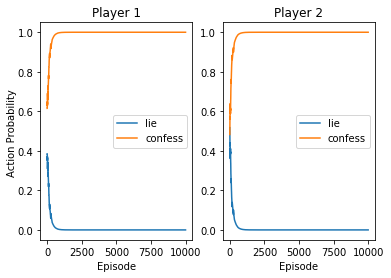

In [12]:
rewards_1 = p1_rewards[0]
rewards_2 = p2_rewards[0]
labels = action_labels[0]
N = 10000

## start with random policies
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))

## start with both tending to lie
#policy_1 = np.array([0.8, 0.2])
#policy_2 = np.array([0.8, 0.2])

## start with both tending to confess
#policy_1 = np.array([0.2, 0.8])
#policy_2 = np.array([0.2, 0.8])

## start with one hardened criminal and one rookie
#policy_1 = np.array([0.8, 0.2])
#policy_2 = np.array([0.2, 0.8])

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, max_iterations=N)
p1_lie, p1_confess = zip(*p1_history)
p2_lie, p2_confess = zip(*p2_history)
print('Converged to probabilities of lying:\n\tPlayer 1:{}\n\tPlayer 2:{}\n'.format(p1_lie[-1], p2_lie[-1]))
print('Converged to probabilities of confessing:\n\tPlayer 1:{}\n\tPlayer 2:{}\n'.format(p1_confess[-1], p2_confess[-1]))
make_plots(p1_history, p2_history, labels)

## Matching Pennies

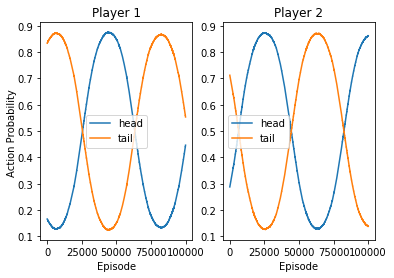

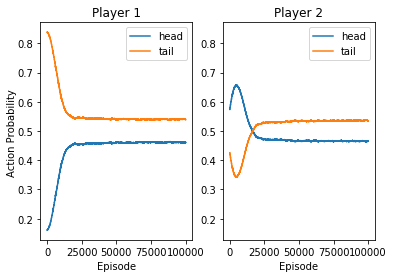

In [6]:
rewards_1 = p1_rewards[1]
rewards_2 = p2_rewards[1]
labels = action_labels[1]
N = 100000

'First Algorithm'
# random policies
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.0001, max_iterations=N)

make_plots(p1_history, p2_history, labels)

'Modified Algorithm'
# random policies
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.0001, max_iterations=N, update_alg='modified')

make_plots(p1_history, p2_history, labels)

## Rock Paper Scissors

/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


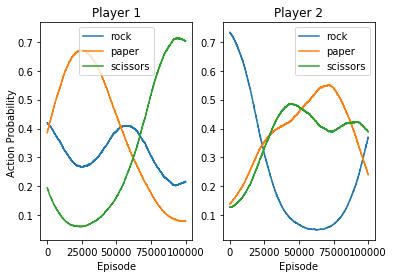

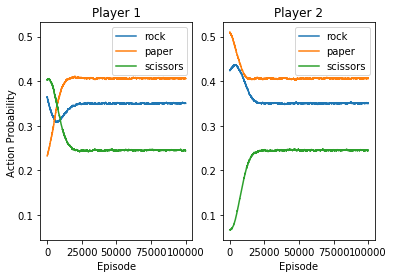

In [7]:
rewards_1 = p1_rewards[2]
rewards_2 = p2_rewards[2]
labels = action_labels[2]
N = 100000

'First Algorithm'
# random policies
policy_1 = normalize(np.random.random(3))
policy_2 = normalize(np.random.random(3))

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.0001, max_iterations=N)

p_rock1, p_paper1, p_scissors1 = zip(*p1_history)
p_rock2, p_paper2, p_scissors2 = zip(*p2_history)

make_plots(p1_history, p2_history, labels)


'Modified Algorithm'
# random policies
policy_1 = normalize(np.random.random(3))
policy_2 = normalize(np.random.random(3))

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.0001, max_iterations=N, update_alg='modified')

p_rock1, p_paper1, p_scissors1 = zip(*p1_history)
p_rock2, p_paper2, p_scissors2 = zip(*p2_history)

make_plots(p1_history, p2_history, labels)

# All Three Games

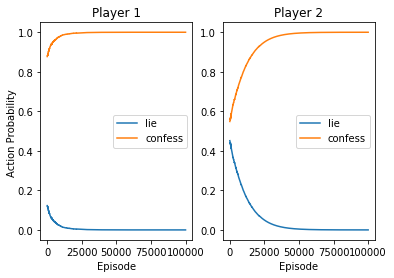

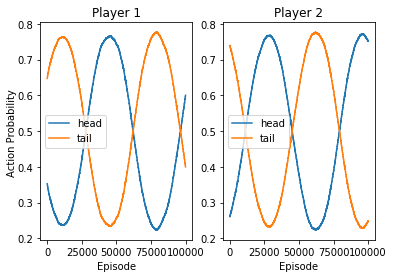

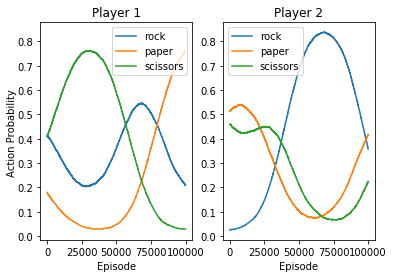

In [18]:
N = 100000
for game in range(3):
    rewards_1 = p1_rewards[game]
    rewards_2 = p2_rewards[game]
    labels = action_labels[game]
    size = len(labels)
    #random starting policies
    policy_1 = normalize(np.random.random(size))
    policy_2 = normalize(np.random.random(size))
    p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.0001, max_iterations=N)
    make_plots(p1_history, p2_history, labels)